<p><a name="sections"></a></p>


# Data Exploration
</a><br>
- <a href="#glance">First Glance at the Data</a><br>
- <a href="#processing">Data Processing</a><br>
    - <a href="#domain">1.Domain Knowledge Processing</a><br>
    - <a href="#outliers">2.Handling Outliers</a><br>
    - <a href="#missing">3.Missing Values</a><br>
    - <a href="#transform">4.Feature Transformation </a><br>
    - <a href="#numeric">5.Numeric Feature Processing </a><br>
    - <a href="#categorical">5.Categorical Feature Processing </a><br>


</a><br>
- **Understand the problem**.  We'll first look at the data and each variable about their meaning and importance for this problem.
- **Univariable study**. We'll just focus on the dependent variable ('SalePrice') and use domain knowledge to handle it.
- **Multivariate study**. We'll try to understand how the dependent variable and independent variables relate.
- **Basic cleaning**. We'll clean the dataset and handle the missing data, outliers and both numeric and categorical variables.
- **Test assumptions**. We'll check if our data meets the assumptions required by most multivariate techniques.
- **Function**. The findings in this data exploration will be summarized in a data processing function for modeling use.
</a><br>
### Links:
- **Comprehensive data exploration with Python** https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python



In [2]:
import numpy as np
import pandas as pd

pd.options.display.max_columns = None
pd.options.display.max_rows = 100

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import matplotlib as matplotlib
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler 

#Comprehensive data exploration with Python
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<p><a name="glance"></a></p>

## First Glance at the Data 

In [51]:
# Importing data 

df_raw = pd.read_csv('train.csv',index_col=0)
df_raw_test = pd.read_csv('test.csv',index_col=0)
df_raw = pd.concat([df_raw, df_raw_test], sort = False) 
#df_raw.describe()

In [ ]:
# df_raw.columnss
# df_raw.dtypes

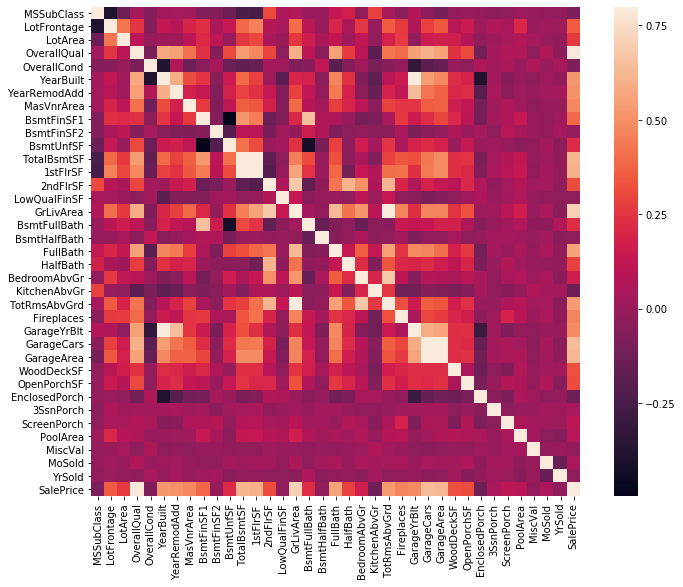

In [27]:
#correlation matrix
corrmat = df_raw.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

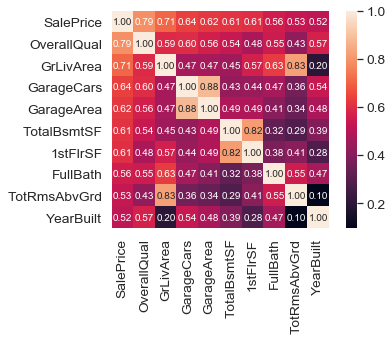

In [15]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_raw[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

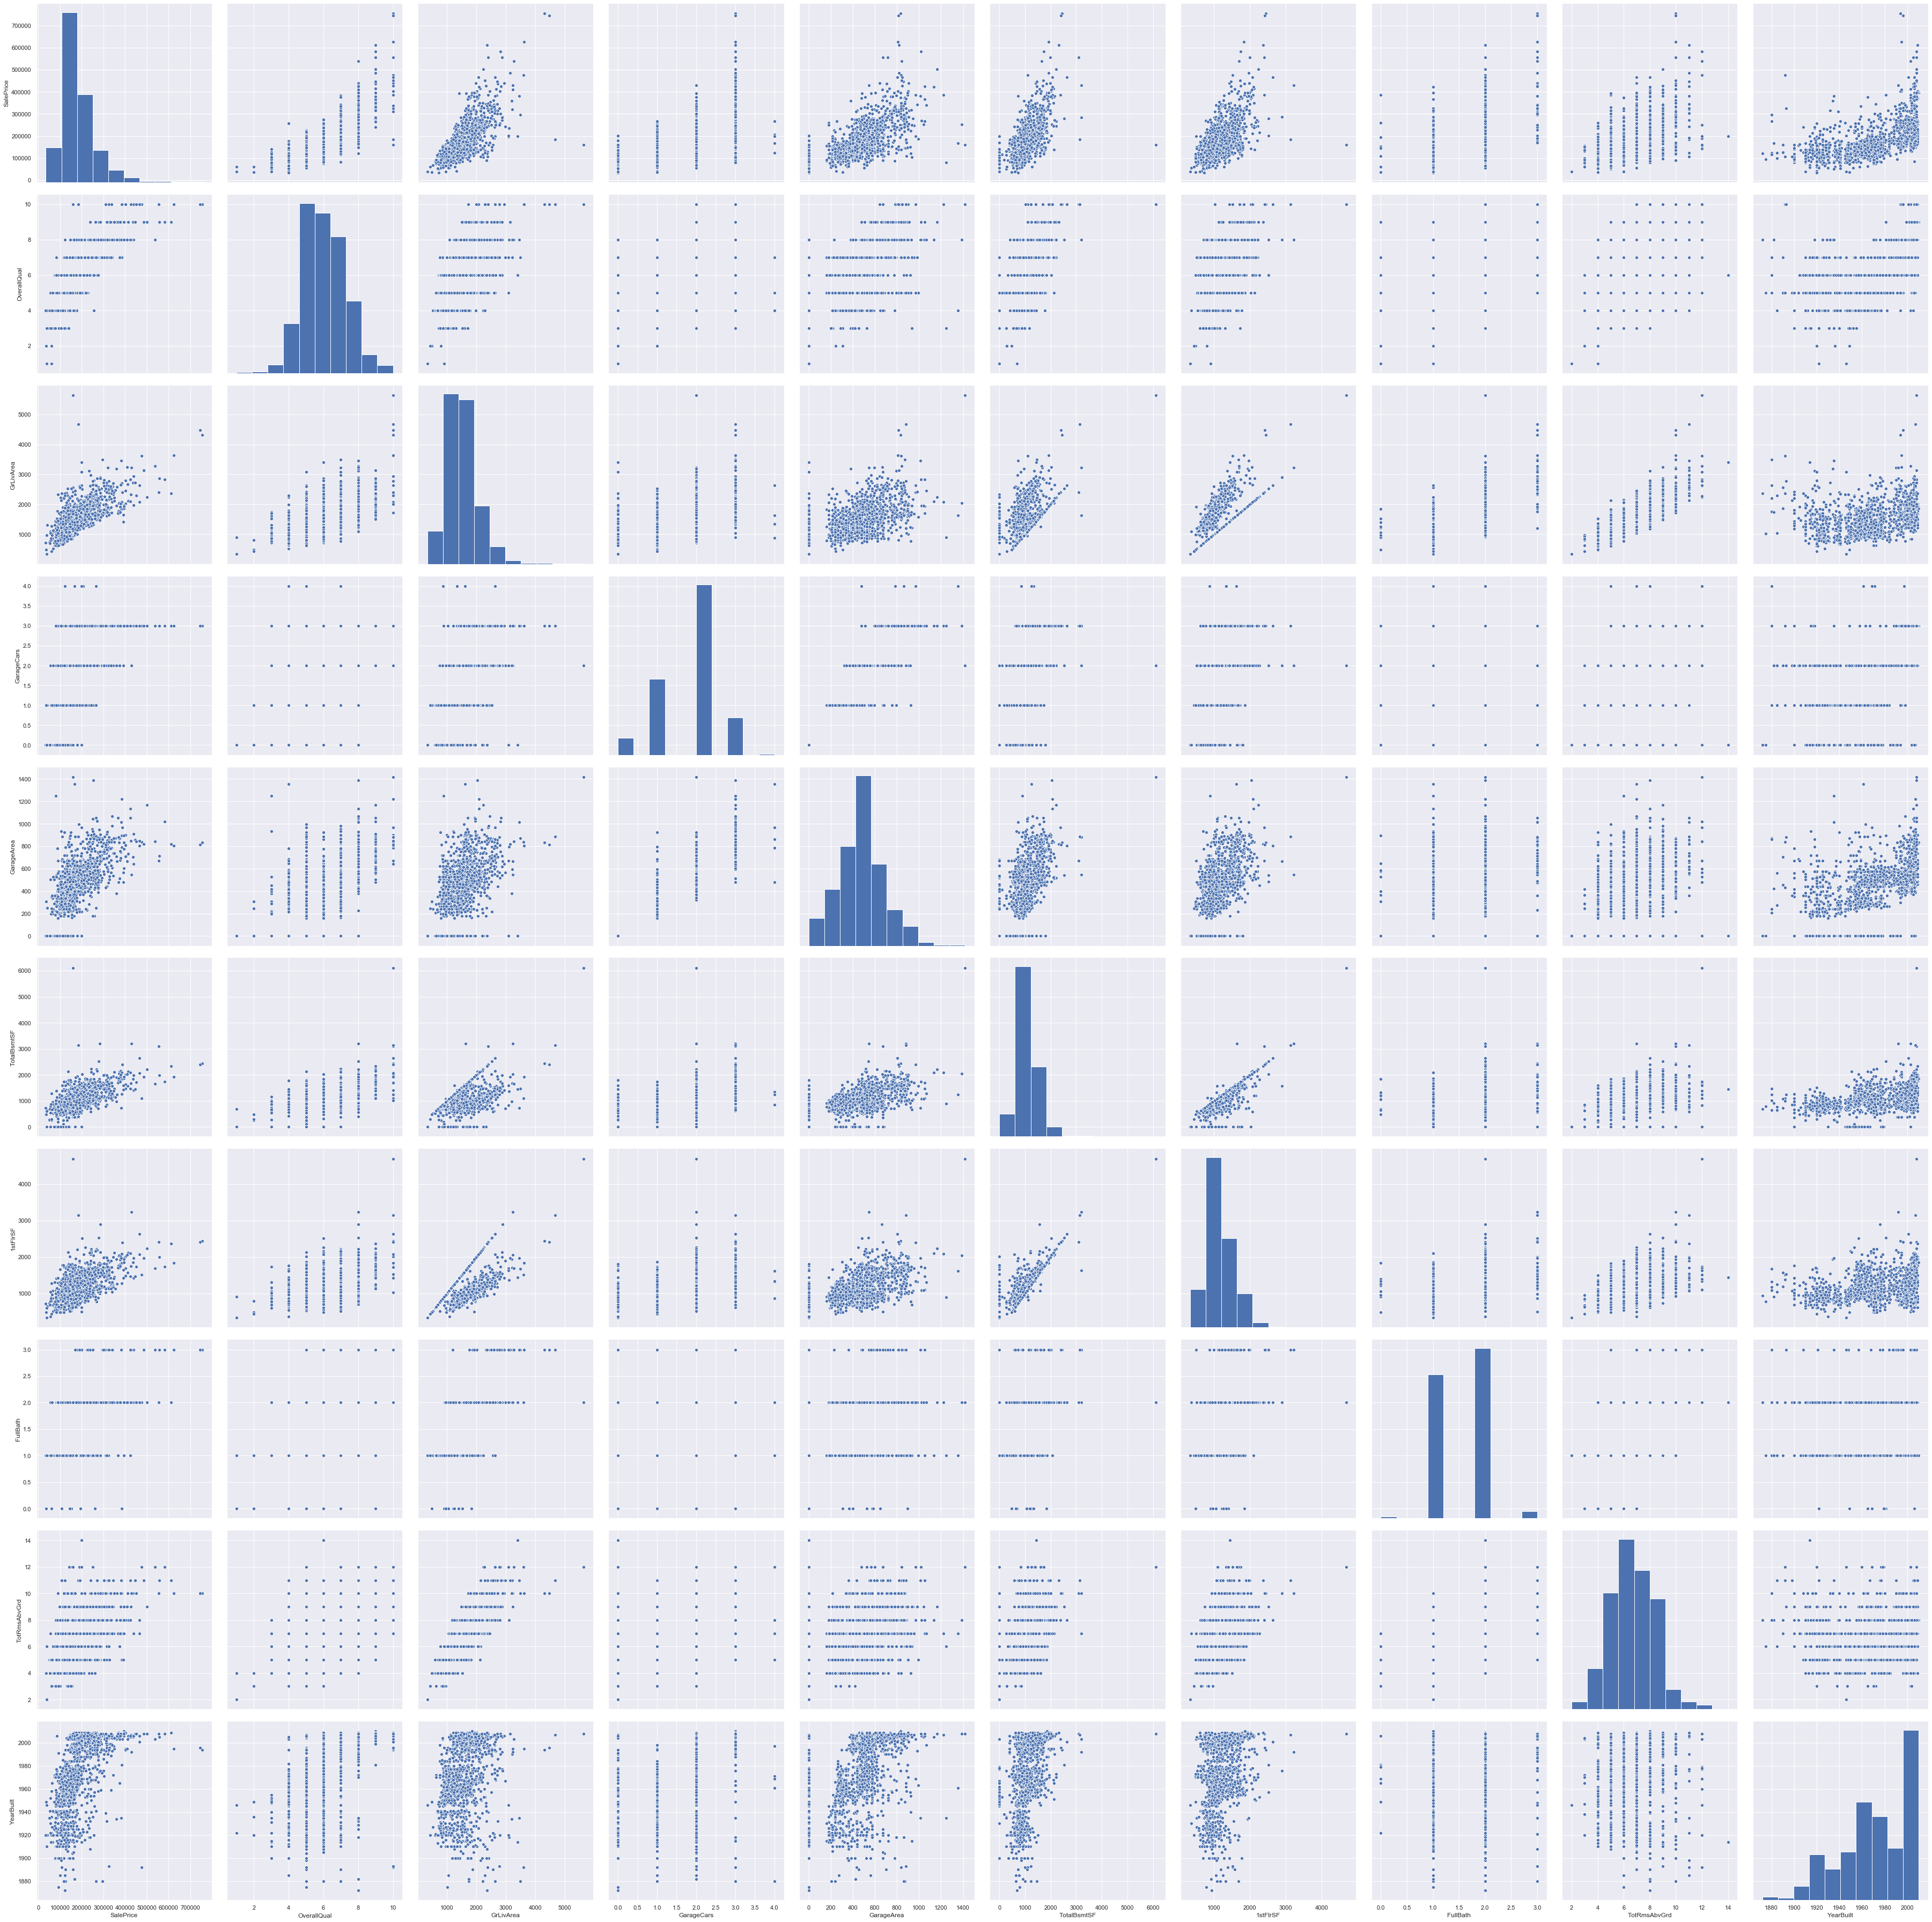

In [7]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea','TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(df_raw[cols], size = 5)
plt.show();

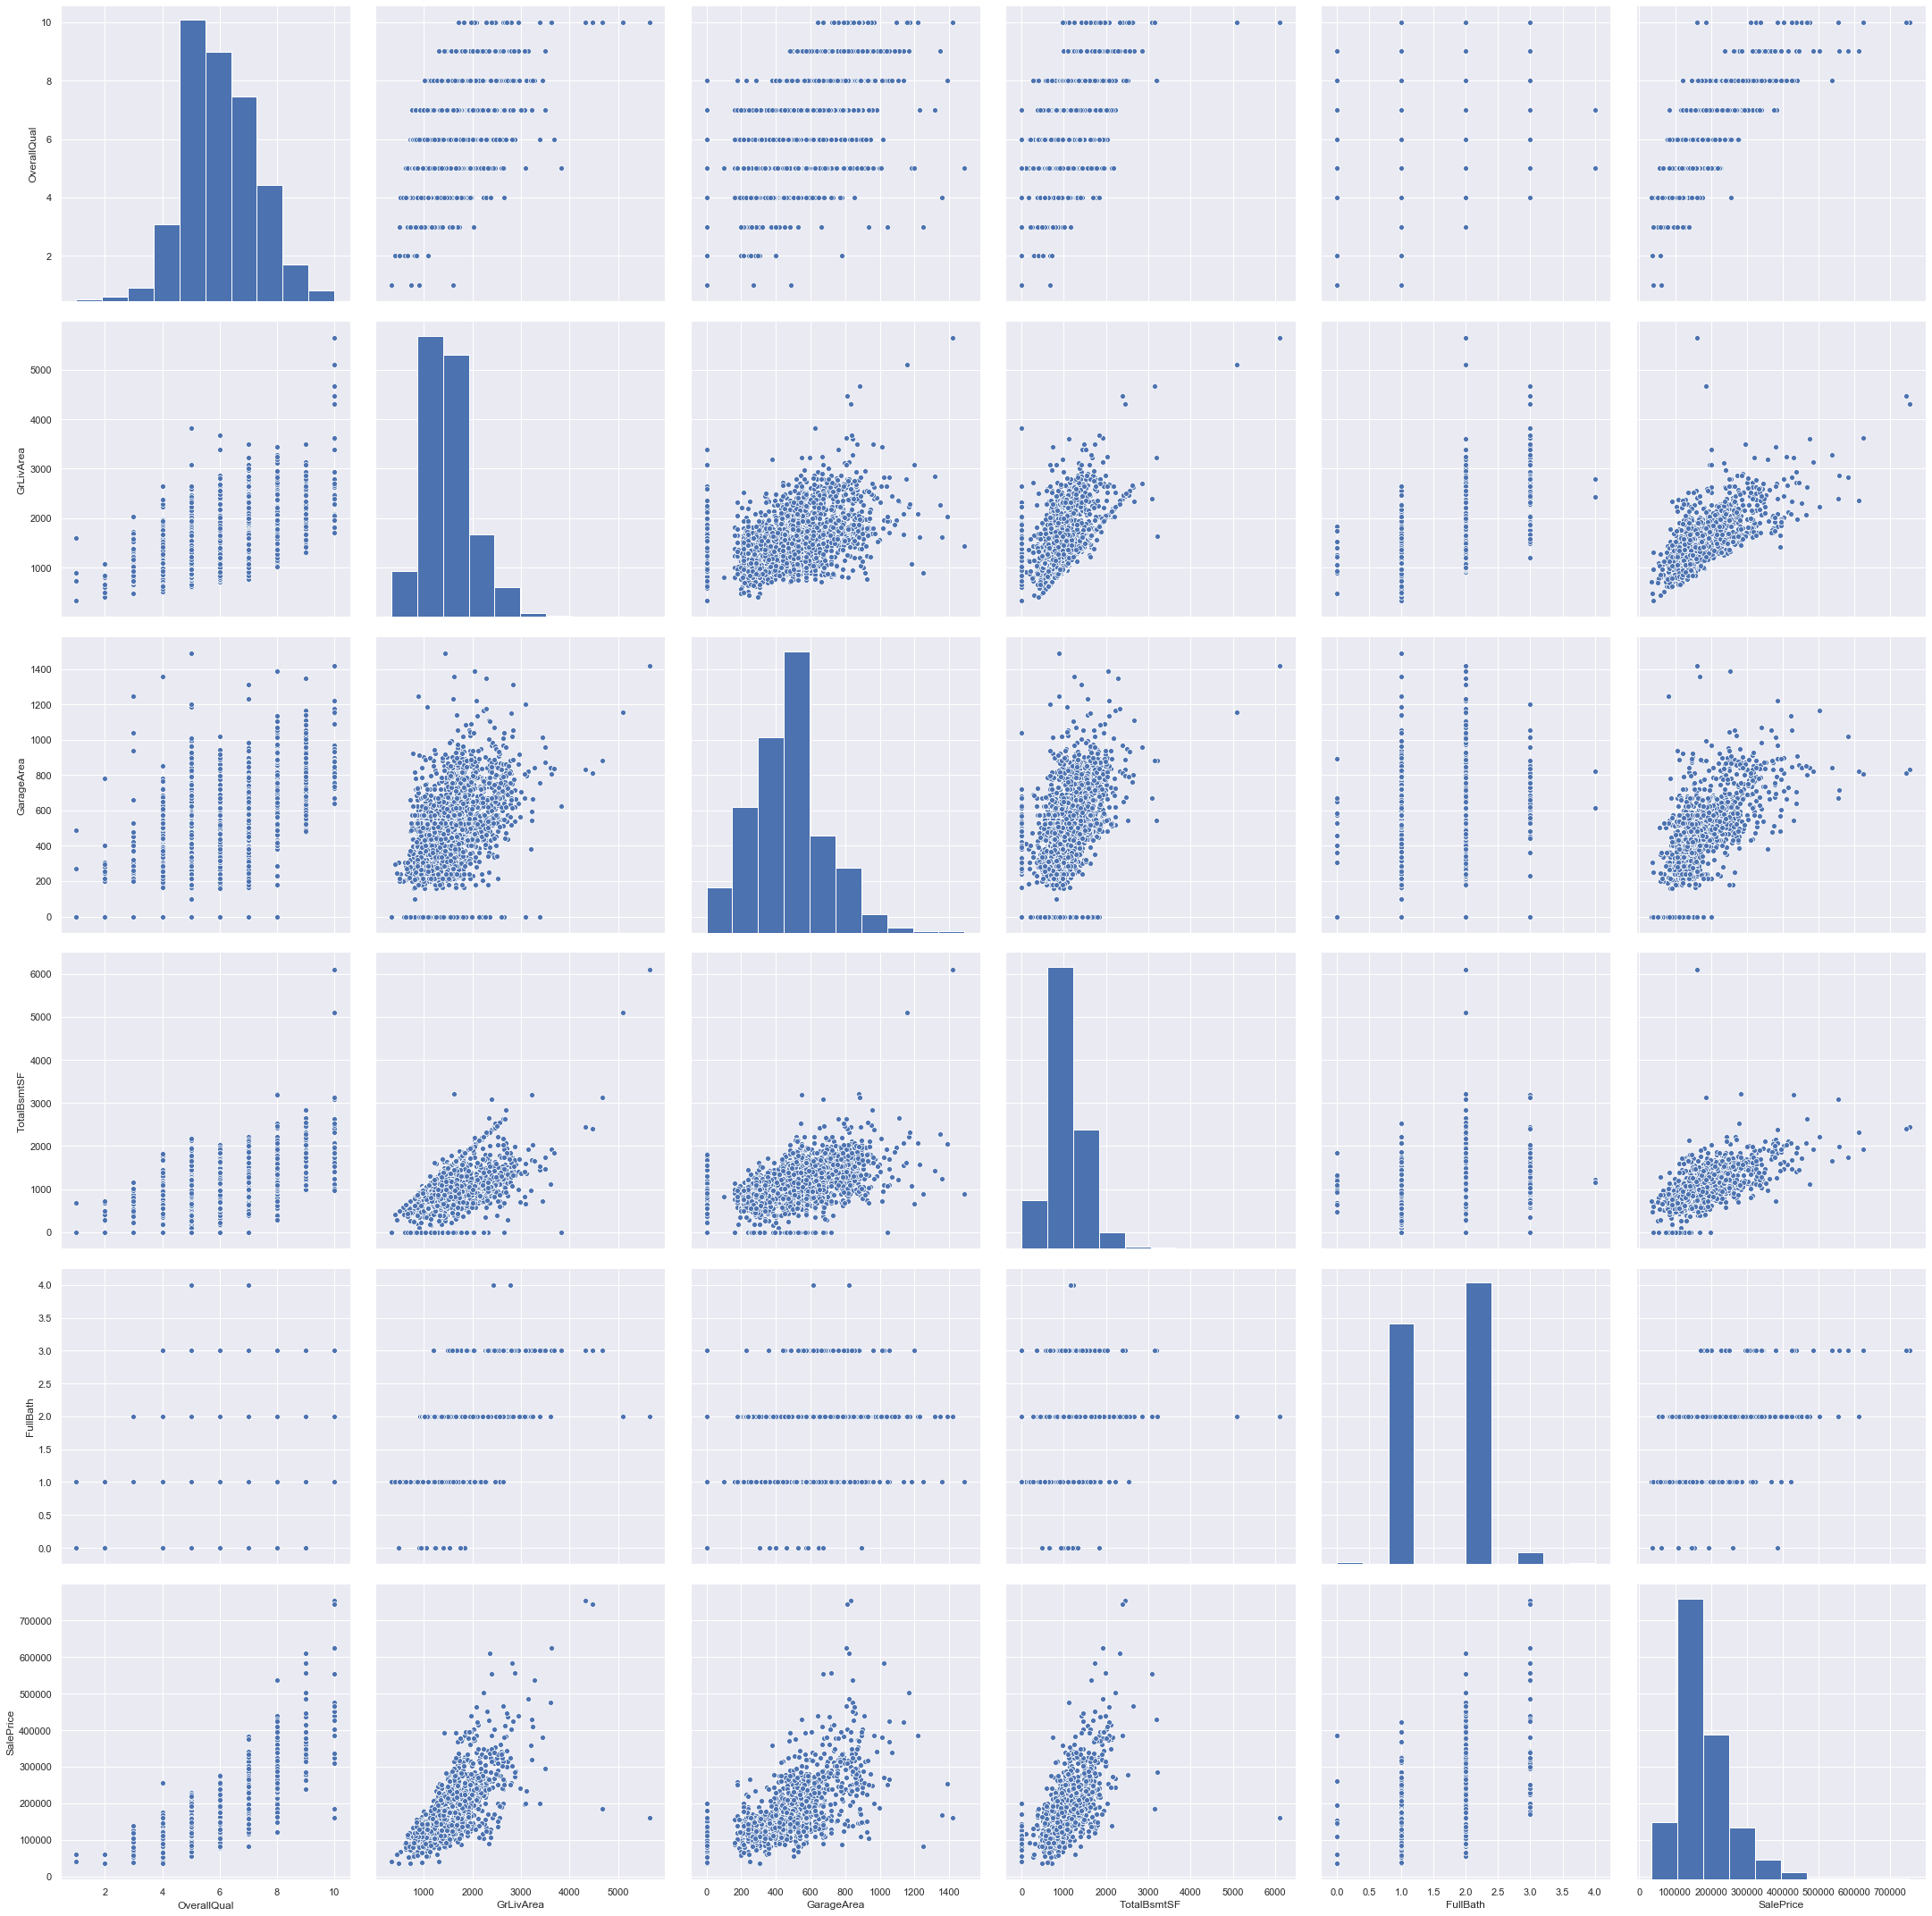

In [118]:
#scatterplot
sns.set()
cols = [ 'OverallQual', 'GrLivArea', 'GarageArea','TotalBsmtSF', 'FullBath','SalePrice']
sns.pairplot(df_raw[cols], size =5)
plt.show();

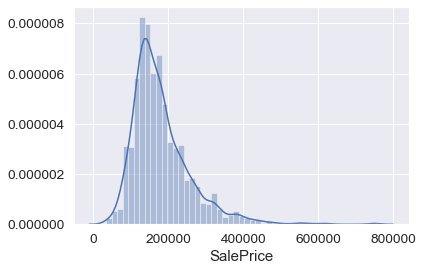

In [20]:
#histogram
sns.distplot(df_raw['SalePrice']);

- Deviate from the normal distribution.
- Have appreciable positive skewness.
- Show peakedness.

 <p><a name="processing"></a></p>

## Data Processing

- <a href="#domain">1.Domain Knowledge Processing</a><br>
- <a href="#outliers">2.Handling Outliers</a><br>
- <a href="#missing">3.Missing Values</a><br>
- <a href="#transform">4.Feature Transformation </a><br>
- <a href="#numeric">5.Numeric Feature Processing </a><br>

- <a href="#DM">6.Grouping Operations</a><br>
- <a href="#miss">7.Feature Split</a><br>
- <a href="#grouping">8.Scaling</a><br>
- <a href="#grouping">9.Extracting Date</a><br>


In [70]:
# make a copy so the raw data will not be affected 
df_clean = df_raw.copy()

 <p><a name="domain"></a></p>
 
### Domain Knowledge Processing

In [75]:
# Combine bathroom quanlitity 
df_clean['BsmtBath'] = df_clean.BsmtFullBath + df_clean.BsmtHalfBath * 0.5
df_clean['Bath'] = df_clean.FullBath + df_clean.HalfBath * 0.5
df_clean = df_clean.drop(['BsmtFullBath', 'BsmtHalfBath','FullBath','HalfBath'], axis=1)

# drop TotalBsmtSF - multicollinearaty
#df_clean = df_clean.drop(['TotalBsmtSF'], axis=1)

# drop GrLivArea - multicollinearaty
#df_clean = df_clean.drop(['GrLivArea'], axis=1)

# drop GarageArea - 
df_clean = df_clean.drop(['GarageArea'], axis=1) 

# drop MiscFeature 
df_clean = df_clean.drop(['MiscFeature'], axis=1) 

# 

 <p><a name="outliers"></a></p>
 
 ### Handling Outliers 


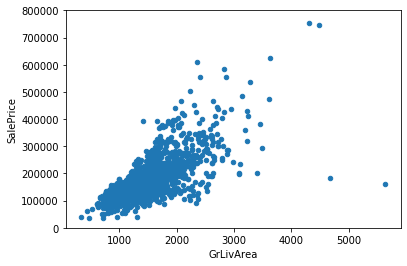

In [7]:
# Handling GrLivArea ourliers 

var = 'GrLivArea'
data = pd.concat([df_raw['SalePrice'], df_raw[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

In [8]:
df_raw.sort_values(by = 'GrLivArea', ascending = False)[:2]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [64]:
outlier_list = [524, 1299]
df_clean = df_clean.drop(outlier_list)

In [ ]:
#df_clean = df_clean[df_clean.GrLivArea < 4000]
# 

In [ ]:
# hard to fit -- will update after running the model 

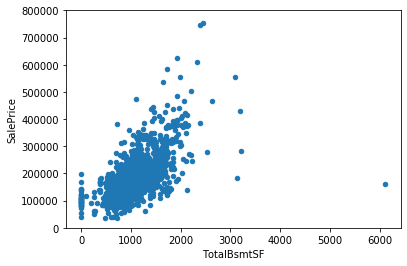

In [10]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_raw['SalePrice'], df_raw[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [11]:
# Handling TotalBsmtSF ourliers  

df_raw.sort_values(by = 'TotalBsmtSF', ascending = False)[:1]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,820,80,2136,GasW,TA,Y,SBrkr,2036,0,0,2036,2,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1965.0,RFn,2,513,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249,BLQ,147,103,1499,GasA,Ex,Y,SBrkr,1619,167,0,1786,2,0,2,0,3,1,TA,7,Typ,2,Gd,Attchd,1965.0,Fin,2,529,TA,TA,Y,670,0,0,0,0,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697,Unf,0,747,1444,GasA,Gd,Y,SBrkr,1444,700,0,2144,0,1,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.0,Fin,2,389,TA,TA,Y,0,98,0,0,0,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219,Unf,0,424,1643,GasA,TA,Y,SBrkr,1824,0,0,1824,1,0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1971.0,Unf,2,739,TA,TA,Y,380,48,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000


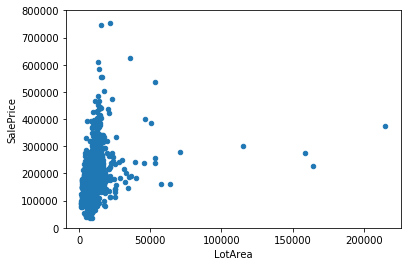

In [49]:
#scatter plot totalbsmtsf/saleprice
var = 'LotArea'
data = pd.concat([df_raw['SalePrice'], df_raw[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));
df_raw.sort_values(by = 'LotArea', ascending = False)[:4]

<p><a name="missing"></a></p>

### Missing Values

In [55]:
total = df_raw.isnull().sum().sort_values(ascending=False)
percent = (df_raw.isnull().sum()/df_raw.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageYrBlt,159,0.054471
GarageQual,159,0.054471


In [77]:
df_clean.columns[df_clean.isnull().any()]

Index(['SalePrice'], dtype='object')

In [74]:
df_clean = df_raw.copy()

In [76]:
# 259 LotFrontage  - replace missing value with 0 
df_clean["LotFrontage"] = df_clean.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# 1369 Alley - replace with None
df_clean.Alley = df_clean.Alley.fillna('None')

# 8 MasVnrType and MasVnrArea - replace MasVnrType with None and MasVnrArea with 0
df_clean.MasVnrType = df_clean.MasVnrType.fillna('None')
df_clean.MasVnrArea = df_clean.MasVnrArea.fillna(0)

# 37 basement: BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2- replace with None
df_clean.BsmtQual = df_clean.BsmtQual.fillna('None')
df_clean.BsmtCond = df_clean.BsmtCond.fillna('None')
df_clean.BsmtExposure = df_clean.BsmtExposure.fillna('None')
df_clean.BsmtFinType1 = df_clean.BsmtFinType1.fillna('None')
df_clean.BsmtFinType2 = df_clean.BsmtFinType2.fillna('None')



# 690 FireplaceQu - replace with None
df_clean.FireplaceQu = df_clean.FireplaceQu.fillna('None')

# 81 Garage: GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond - replace with None and year with 0 
# GarageYrBlt ???
df_clean.GarageType = df_clean.GarageType.fillna('None')
df_clean.GarageFinish = df_clean.GarageFinish.fillna('None')
df_clean.GarageQual = df_clean.GarageQual.fillna('None')
df_clean.GarageCond = df_clean.GarageCond.fillna('None')
df_clean.GarageYrBlt = df_clean.GarageYrBlt.fillna(0)

# 1453 PoolQC - replace with None
df_clean.PoolQC = df_clean.PoolQC.fillna('None')

# 1179 Fence - replace with Nf
df_clean.Fence = df_clean.Fence.fillna('None')

# 1406 MiscFeature - replace with None    
#df_clean.MiscFeature = df_clean.MiscFeature.fillna('None')

# 1 Electrical
df_clean = df_clean[pd.notnull(df_clean.Electrical)]

## missing value only in the test set 
# MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
df_clean['MSZoning'] = df_clean['MSZoning'].fillna(df_clean['MSZoning'].mode()[0])

# Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
df_clean.drop(['Utilities'], axis=1,inplace=True)

# Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
df_clean['Exterior1st'] = df_clean['Exterior1st'].fillna(df_clean['Exterior1st'].mode()[0])
df_clean['Exterior2nd'] = df_clean['Exterior2nd'].fillna(df_clean['Exterior2nd'].mode()[0])

# BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtBath : missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtBath'):
    df_clean[col] = df_clean[col].fillna(0)    

#Garage Cars 
df_clean.GarageCars = df_clean.GarageCars.fillna(0)

# SaleType : Fill in again with most frequent which is "WD"
df_clean['SaleType'] = df_clean['SaleType'].fillna(df_clean['SaleType'].mode()[0])

# KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
df_clean['KitchenQual'] = df_clean['KitchenQual'].fillna(df_clean['KitchenQual'].mode()[0])

# Functional : data description says NA means typical
df_clean["Functional"] = df_clean["Functional"].fillna("Typ")  

In [ ]:
# np.sum(df_clean.isnull())

<p><a name="transform"></a></p>

### Feature Transformation 

In [42]:
df_clean.SalePrice = np.log(df_clean.SalePrice)
df_clean.GrLivArea = np.log(df_clean.GrLivArea)
#df_clean.TotalBsmtSF = np.log(df_clean.TotalBsmtSF)
# after processing missing value 

Skewness: 1.882876
Kurtosis: 6.536282


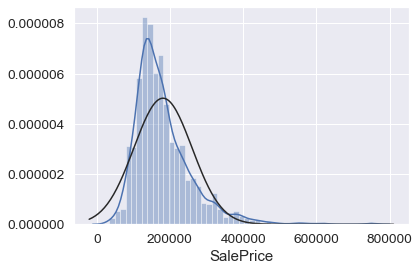

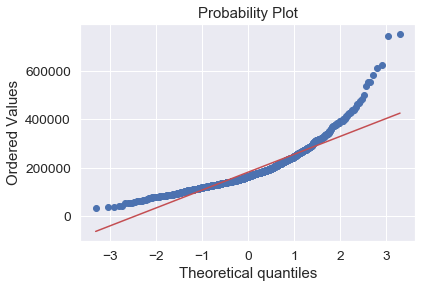

In [32]:
#histogram and normal probability plot
sns.distplot(df_raw['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_raw['SalePrice'], plot=plt)

print("Skewness: %f" % df_raw['SalePrice'].skew())
print("Kurtosis: %f" % df_raw['SalePrice'].kurt())

Skewness: 0.121335
Kurtosis: 0.809532


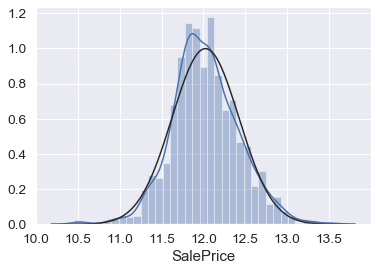

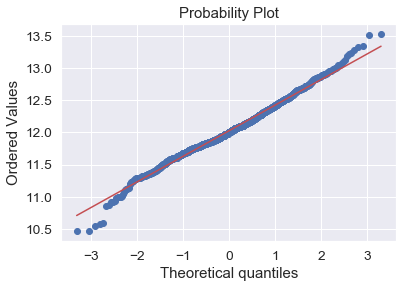

In [33]:
#histogram and normal probability plot
sns.distplot(df_clean['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_clean['SalePrice'], plot=plt)

print("Skewness: %f" % df_clean['SalePrice'].skew())
print("Kurtosis: %f" % df_clean['SalePrice'].kurt())

Skewness: 1.366560
Kurtosis: 4.895121


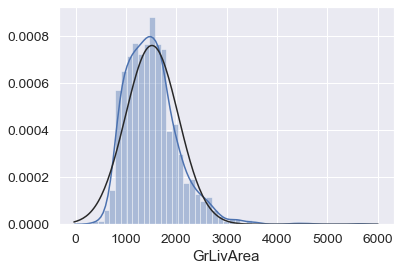

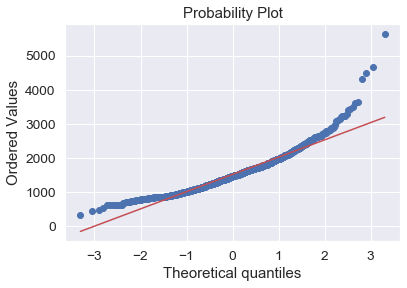

In [34]:
#histogram and normal probability plot
sns.distplot(df_raw['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_raw['GrLivArea'], plot=plt)

print("Skewness: %f" % df_raw['GrLivArea'].skew())
print("Kurtosis: %f" % df_raw['GrLivArea'].kurt())

Skewness: -0.006995
Kurtosis: 0.282603


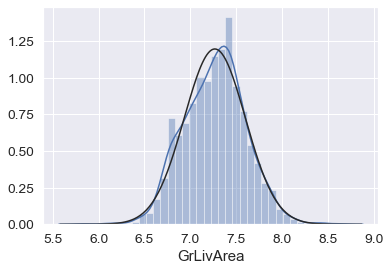

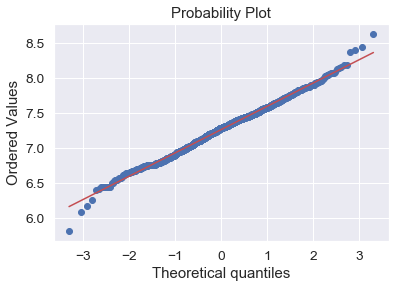

In [35]:
#histogram and normal probability plot
sns.distplot(df_clean['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_clean['GrLivArea'], plot=plt)

print("Skewness: %f" % df_clean['GrLivArea'].skew())
print("Kurtosis: %f" % df_clean['GrLivArea'].kurt())

Skewness: 1.524255
Kurtosis: 13.250483


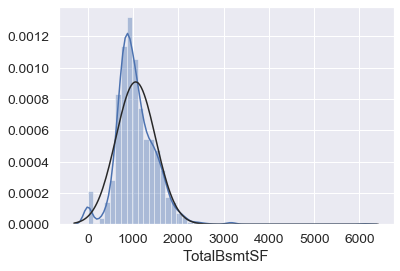

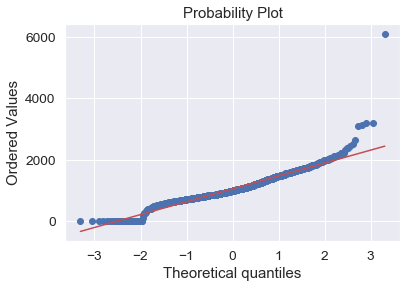

In [39]:
#histogram and normal probability plot
sns.distplot(df_raw['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_raw['TotalBsmtSF'], plot=plt)

print("Skewness: %f" % df_raw['TotalBsmtSF'].skew())
print("Kurtosis: %f" % df_raw['TotalBsmtSF'].kurt())

# sns.distplot(df_clean['TotalBsmtSF'], fit=norm);
# fig = plt.figure()
# res = stats.probplot(df_clean['TotalBsmtSF'], plot=plt)

# print("Skewness: %f" % df_clean['TotalBsmtSF'].skew())
# print("Kurtosis: %f" % df_clean['TotalBsmtSF'].kurt())

<p><a name="numeric"></a></p>

### Numeric Feature Processing 

- scaler 
- normalization 


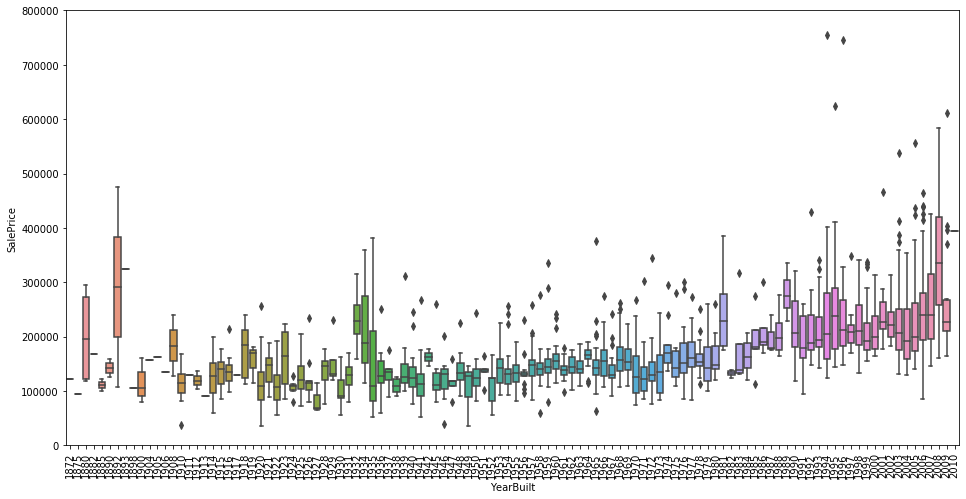

In [21]:
var = 'YearBuilt'
data = pd.concat([df_raw['SalePrice'], df_raw[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

  
 
 ###  Categorical Features Processsing

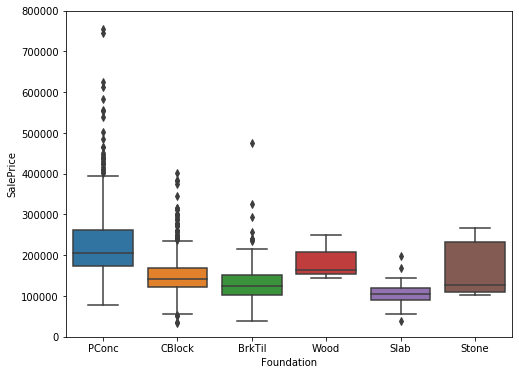

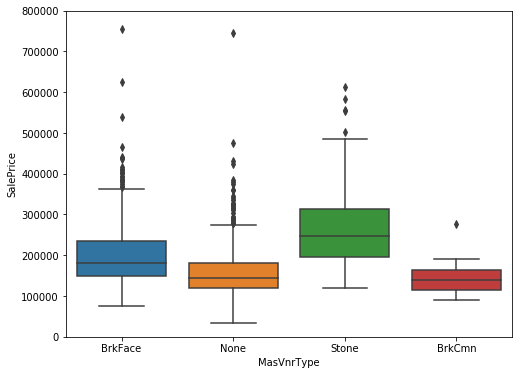

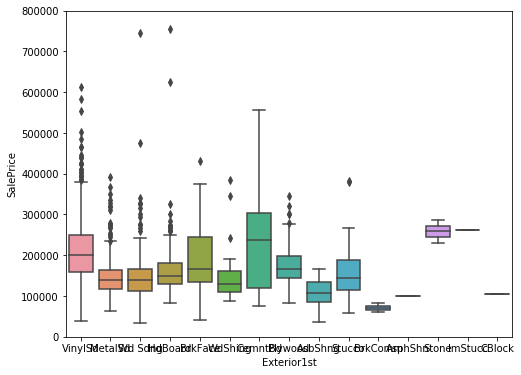

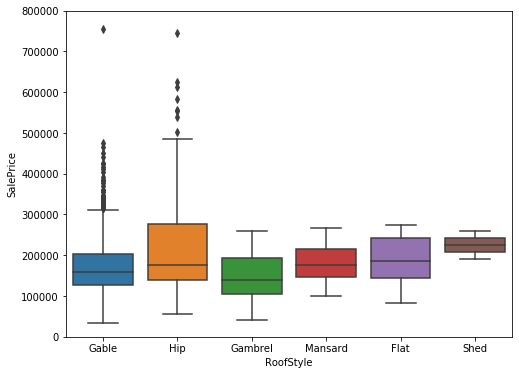

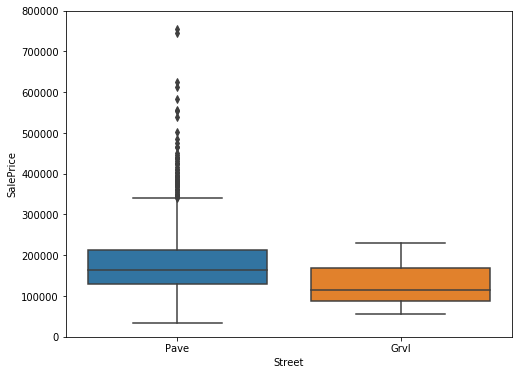

In [113]:
#box plot ordinal/saleprice
ord_list = ['Foundation','MasVnrType','Exterior1st','RoofStyle',
#             'RoofStyle', 'Neighborhood','LandSlope',
#             'LotConfig','Utilities','LotShape','LandContour',
#             'MSZoning','OverallQual','BsmtCond','Alley','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','ExterCond','ExterQual','FireplaceQu','Functional','GarageCond','GarageQual','HeatingQC','KitchenQual','LandSlope','LotShape','PavedDrive','PoolQC',
            'Street']
for ordinal in ord_list:
    data = pd.concat([df_raw['SalePrice'], df_raw[ordinal]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=ordinal, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000);
    

In [108]:
# Neighborhood
df = df_clean[['SalePrice', 'GrLivArea', 'Neighborhood']]
df['UnitPrice'] = df_clean.SalePrice / df_clean.GrLivArea
df.groupby(['Neighborhood'])['UnitPrice'].agg({"UnitPrice":"mean"}).sort_values(['UnitPrice'])


,UnitPrice
Neighborhood,
SWISU,84.755233
IDOTRR,89.136043
OldTown,91.427282
BrDale,91.950543
Blueste,98.969369
Edwards,101.832958
MeadowV,101.926201
BrkSide,105.966809
NWAmes,111.848349


In [43]:
 #Encode some categorical features as ordered numbers when there is information in the order.
df_clean = df_clean.replace({"Alley" : {"None":0,"Grvl" : 1, "Pave" : 2},
                   "Neighborhood" : {"SWISU" : 1, "IDOTRR" : 2, "OldTown" : 3, "BrDale" : 4, "Blueste": 5,
                   "Edwards" : 6, "MeadowV" : 7, "BrkSide" : 8, "NWAmes" : 9, "NAmes" : 10, "NPkVill" : 11, "Sawyer" : 12, "Gilbert": 13, 
                   "SawyerW" : 14, "Crawfor" : 15, "ClearCr" : 16, "Mitchel" : 17, "NoRidge": 18, "Blmngtn" : 19, "CollgCr" : 20, "Timber" : 21, "Somerst" : 22, "Veenker": 23, "NridgHt" : 24, "StoneBr": 25 },
                   "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                   "BsmtExposure" : {"None" : 0,"No":1, "Mn" : 2, "Av": 3, "Gd" : 4},
                   "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                     "ALQ" : 5, "GLQ" : 6},
                   "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                     "ALQ" : 5, "GLQ" : 6},
                   "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                   "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                   "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                   "FireplaceQu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                   "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5,
                                   "Min2" : 6, "Min1" : 7, "Typ" : 8},
                   "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                   "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                   "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                   "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                   "LandSlope" : {"Sev" : 3, "Mod" : 2, "Gtl" : 1},
                   "LotShape" : {"IR3" : 4, "IR2" : 3, "IR1" : 2, "Reg" : 1},
                   "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                   "PoolQC" : {"None" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                   "Street" : {"Grvl" : 1, "Pave" : 2}})

In [ ]:
# MSSubClass processing - MSSubClass 20-90 contains only duplicate information with HouseStyle and YearBuilt
# replace with 0 
'''
20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

HouseStyle: Style of dwelling
       
       1Story One story
       1.5Fin One and one-half story: 2nd level finished
       1.5Unf One and one-half story: 2nd level unfinished
       2Story Two story
       2.5Fin Two and one-half story: 2nd level finished
       2.5Unf Two and one-half story: 2nd level unfinished
       SFoyer Split Foyer
       SLvl   Split Level
'''
# df_clean['MSSubClass'] = df_clean['MSSubClass'].replace([20,30,40,45,50,60,70,75,80,85], 0)
df_clean['MSSubClass'] = df_clean['MSSubClass'].replace(['20','30','40','45','50','60','70','75','80','85'], '0')

# convert numerical to categorical 
# df_clean[['MSSubClass','OverallQual','OverallCond']] = df_clean[['MSSubClass','OverallQual','OverallCond']].astype(str)
df_clean['MSSubClass'] = df_clean['MSSubClass'].astype(str)




# ordinal_list = ['OverallQual','OverallCond','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageQual','PoolQC']

# enc = OrdinalEncoder()
# df_clean[ordinal_list] = enc.fit(df_clean[ordinal_list])

# OverallQual
# OverallCond
# ExterCond
# BsmtQual
# BsmtCond
# HeatingQC
# KitchenQual
# Functional
# FireplaceQu
# GarageQual
# PoolQC


## dummies 
df_clean = pd.get_dummies(df_clean, columns=df_clean.select_dtypes(include=['object']).columns, drop_first=True)



In [ ]:
# df_clean.select_dtypes(include=['object']).columns

In [ ]:
# df_clean.dtypes

In [ ]:
# df_clean.select_dtypes(include=['object'])

In [47]:
df_clean.sample(20)

,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice,BsmtBath,Bath,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtCond_1,BsmtCond_2,BsmtCond_3,BsmtCond_4,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1175,80.0,16560,2,0,3,3,6,8,1932,1950,0.0,3,3,4,1,3,503,1,0,449,952,3,1170,1175,0,7.760041,4,1,3,9,8,1,4,1932.0,2,3,3,2,0,0,0,0,0,0,0,0,7,2006,12.384219,0.0,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,